In [1]:
import shutil



In [8]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile

In [2]:
shutil.rmtree('/content/.config')

In [3]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d teguhbudi/gym-tools 

 65% 17.0M/26.1M [00:00<00:00, 30.6MB/s]
100% 26.1M/26.1M [00:00<00:00, 44.9MB/s]


In [30]:
local_zip = '/content/gym-tools.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/data')
zip_ref.close()

In [ ]:

# from PIL import Image
# folder_path = '/content/data/training'
# extensions = []
# for fldr in os.listdir(folder_path):
#     sub_folder_path = os.path.join(folder_path, fldr)
#     for filee in os.listdir(sub_folder_path):
#         file_path = os.path.join(sub_folder_path, filee)
#         print('** Path: {}  **'.format(file_path), end="\r", flush=True)
#         im = Image.open(file_path)
#         rgb_im = im.convert('RGB')
#         if filee.split('.')[1] not in extensions:
#             extensions.append(filee.split('.')[1])
    

In [ ]:
# !rm /content/data/Treadmill/treadmill-1.jpeg

In [ ]:
# rmdir /content/data/Dataset Gym Tools/Dataset Gym Tools/Dumbell/.ipynb_checkpointspoints

In [31]:
# Mengimpor model pre-trained (misalnya, VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [32]:
# Membekukan lapisan-lapisan yang sudah dilatih pada model base
for layer in base_model.layers:
    layer.trainable = False


In [33]:
TRAINING_DIR = "/content/data/training"
VALIDATION_DIR = "/content/data/testing"
# Experiment with your own parameters here to really try to drive it to 99.9% accuracy or better
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,      # Rentang rotasi dalam derajat
                                    width_shift_range=0.2,  # Jarak pergeseran horizontal dalam fraksi dari lebar gambar
                                    height_shift_range=0.2, # Jarak pergeseran vertikal dalam fraksi dari tinggi gambar
                                    # zoom_range=0.2,         # Rentang zoom dalam fraksi
                                    horizontal_flip=True,   # Menerapkan pemutaran horizontal acak
                                   )
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

Found 439 images belonging to 10 classes.
Found 59 images belonging to 10 classes.


In [49]:
# x = base_model.output
# x = tf.keras.layers.MaxPooling2D()(x)
# x = Dense(256, activation='relu')(x)
# predictions = Dense(10, activation='softmax')(x)

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [39]:
# model = Model(inputs=base_model.input, outputs=predictions)

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 512)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense_14 (Dense)            (None, 256)               524544    
                                                                 
 dense_15 (Dense)            (None, 10)                2570      
                                                                 
Total params: 15,241,802
Trainable params: 527,114
Non-trainable params: 14,714,688
____________________________________

In [51]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
      if logs['val_accuracy'] > 0.8:
        self.model.stop_training = True

myCallback = myCallback()

In [52]:
history = model.fit(train_generator, epochs=5,
                    validation_data = validation_generator,
                    callbacks = [myCallback])

Epoch 1/5
22/22 [==============================] - 131s 6s/step - loss: 1.2692 - accuracy: 0.5991 - val_loss: 0.9164 - val_accuracy: 0.6949
Epoch 2/5
22/22 [==============================] - 128s 6s/step - loss: 0.3144 - accuracy: 0.9180 - val_loss: 0.5728 - val_accuracy: 0.7458
Epoch 3/5
22/22 [==============================] - 128s 6s/step - loss: 0.1693 - accuracy: 0.9613 - val_loss: 0.5295 - val_accuracy: 0.7966
Epoch 4/5
22/22 [==============================] - 122s 6s/step - loss: 0.1213 - accuracy: 0.9613 - val_loss: 0.5569 - val_accuracy: 0.8305


In [53]:
import matplotlib.pyplot as plt
import numpy as np

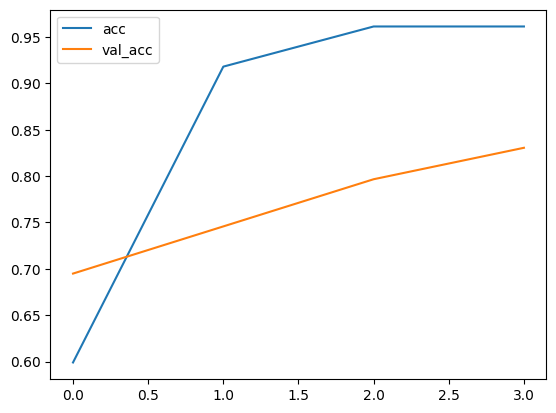

In [55]:
plt.plot(np.arange(4), history.history['accuracy'])
plt.plot(np.arange(4), history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.show()

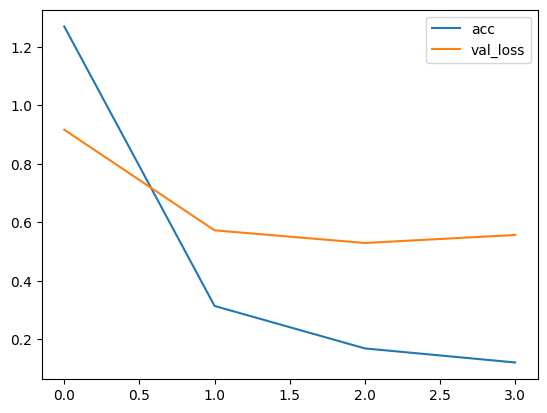

In [56]:
plt.plot(np.arange(4), history.history['loss'])
plt.plot(np.arange(4), history.history['val_loss'])
plt.legend(['acc', 'val_loss'])
plt.show()

In [ ]:
from google.colab import files


In [ ]:
from PIL import Image
import numpy as np

In [ ]:
image = files.upload()

Saving 3 (1).jpg to 3 (1).jpg


In [ ]:
for i in image.keys():
  path = i

In [ ]:
image = Image.open(i)
image = np.asarray(image.resize((150, 150)))
image = image/255
image = np.expand_dims(image, 0)

In [ ]:
result = np.argmax(model.predict(image))

1/1 [==============================] - 0s 227ms/step


In [ ]:
if result == 0:
  print('Barbell')
elif result == 1:
  print('Dumbell')
elif result == 2:
  print('Gym ball')
elif result == 3:
  print('Kattle ball')
elif result == 4:
  print('Leg press')
elif result == 5:
  print('Punching bag')
elif result == 6:
  print('Roller ABS')
elif result == 7:
  print('Statis bicycle')
elif result == 8:
  print('Step')
elif result == 9:
  print('Treadmill')

Leg press


In [58]:
model.save('something.h5')